In [4]:
#  Import Libraries
import pandas as pd
import numpy as np
import statistics

# Read and display 5 records of data

In [5]:
# read csv file and add columns to "wdbc.data"
data = pd.read_csv("wdbc.data",names=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'])

In [6]:
#display 5 records of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Q1. What are the mean, median and standard deviation of the “perimeter” feature?

In [7]:
#calculating mean and std deviation of "perimeter" feature
data[['perimeter_mean','perimeter_se','perimeter_worst']].describe()

,perimeter_mean,perimeter_se,perimeter_worst
count,569.000000,569.000000,569.000000
mean,91.969033,2.866059,107.261213
std,24.298981,2.021855,33.602542
min,43.790000,0.757000,50.410000
25%,75.170000,1.606000,84.110000
50%,86.240000,2.287000,97.660000
75%,104.100000,3.357000,125.400000
max,188.500000,21.980000,251.200000


In [8]:
data.shape

(569, 33)

In [9]:
# calculating mode

print("mode of perimeter_se: ",statistics.mode(data['perimeter_se']))

mode of perimeter_se:  1.778


In [10]:
statistics.mode(data['perimeter_worst'])

StatisticsError: no unique mode; found 3 equally common values

In [11]:
statistics.mode(data['perimeter_mean'])

StatisticsError: no unique mode; found 3 equally common values

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Q2. Is the first feature in this data set (the “radius”) normally distributed? Please quantitatively define you answer. If not, what might be a more appropriate distribution?

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

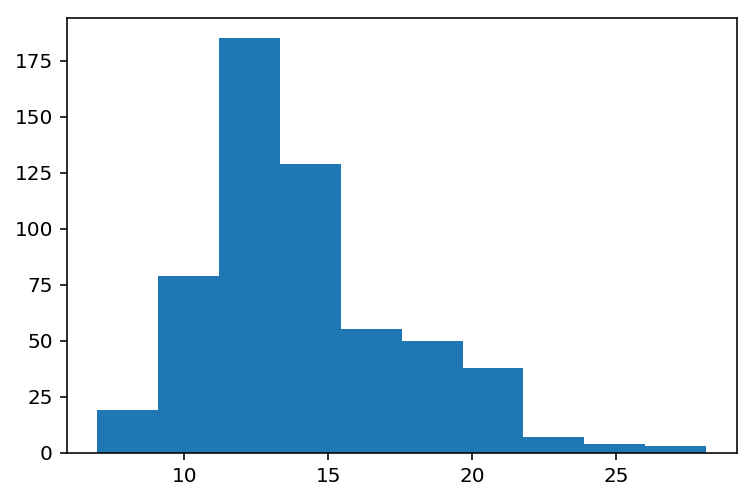

In [14]:
plt.hist(data['radius_mean'])

(array([ 34., 160., 167.,  69.,  53.,  47.,  22.,   9.,   7.,   1.]),
 array([ 7.93 , 10.741, 13.552, 16.363, 19.174, 21.985, 24.796, 27.607,
        30.418, 33.229, 36.04 ]),
 <a list of 10 Patch objects>)

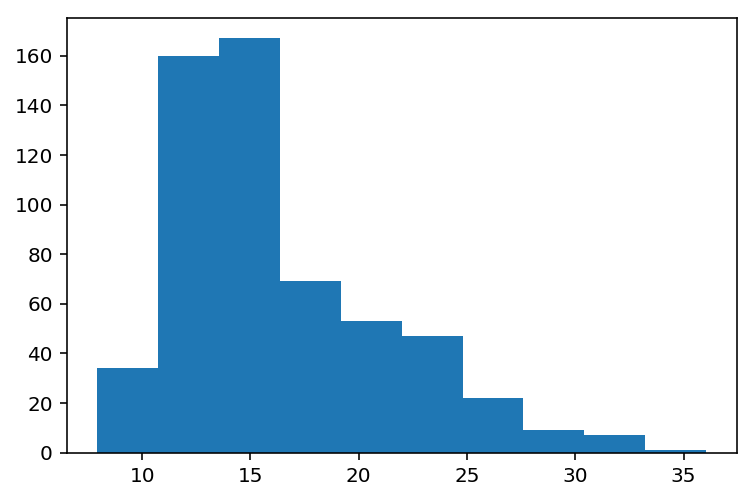

In [15]:
plt.hist(data['radius_worst'])

(array([357., 137.,  44.,  24.,   4.,   1.,   0.,   0.,   1.,   1.]),
 array([0.1115 , 0.38765, 0.6638 , 0.93995, 1.2161 , 1.49225, 1.7684 ,
        2.04455, 2.3207 , 2.59685, 2.873  ]),
 <a list of 10 Patch objects>)

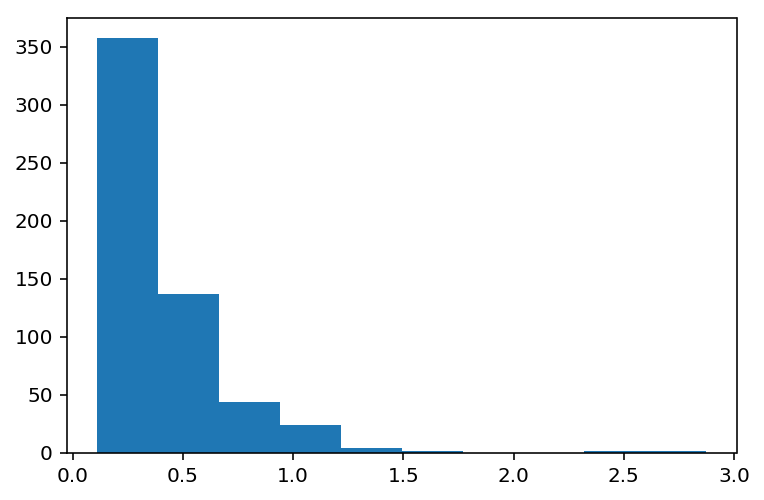

In [16]:
plt.hist(data['radius_se'])

[Text(0,0.5,'radius'), Text(0.5,0,'Normal Distribution')]

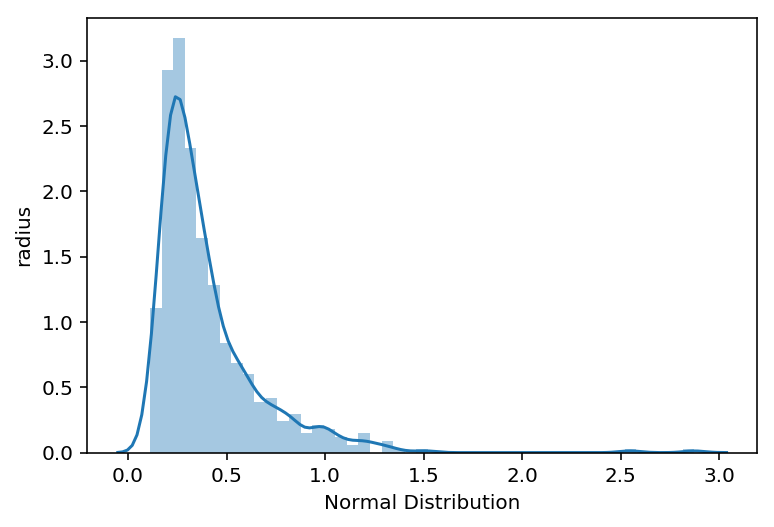

In [17]:
ax = sns.distplot(data['radius_se'])
ax.set(xlabel='Normal Distribution', ylabel='radius')

In [14]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [15]:
stat, p = shapiro(data['radius_se'])       #shapiro returns both the W-statistic calculated by the test and the p-value

In [16]:
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.746, p=0.000


In [17]:
# alpha is used to interpret the p-value
alpha = 0.05
if p > alpha:
	print('Sample looks normal (fail to reject null hypothesis)')
else:
	print('Sample does not look Gaussian (reject null hypothesis)')

Sample does not look Gaussian (reject null hypothesis)


In [18]:
stat, p = normaltest(data['radius_se'])     # normaltest returns the test statistic and the p-value.
print('Statistics=%.3f, p=%.3f' % (stat, p))
# A threshold level is chosen alpha, typically 5% (or 0.05), that is used to interpret the p-value
alpha = 0.05
if p > alpha:
	print('Sample looks normal (fail to reject null hypothesis)')
else:
	print('Sample does not look Gaussian (reject null hypothesis)')

Statistics=422.615, p=0.000
Sample does not look Gaussian (reject null hypothesis)


# Model Building 

In [25]:
# split data into X and y

In [21]:
y = data.diagnosis

In [19]:
X = data.drop(['Unnamed: 32',"id",'diagnosis'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


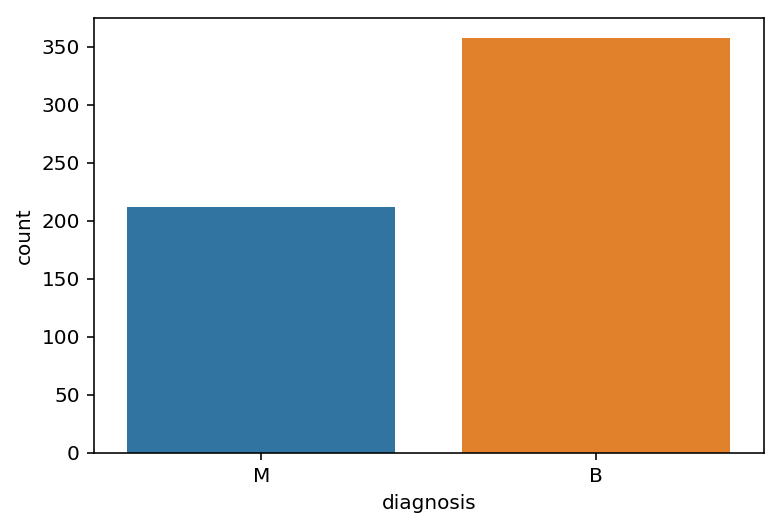

In [22]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [41]:
# Feature Selection

In [23]:
# train test split
from sklearn.model_selection import train_test_split

In [24]:
X_train,y_train,X_test,y_test = train_test_split(X, y, test_size=0.2)

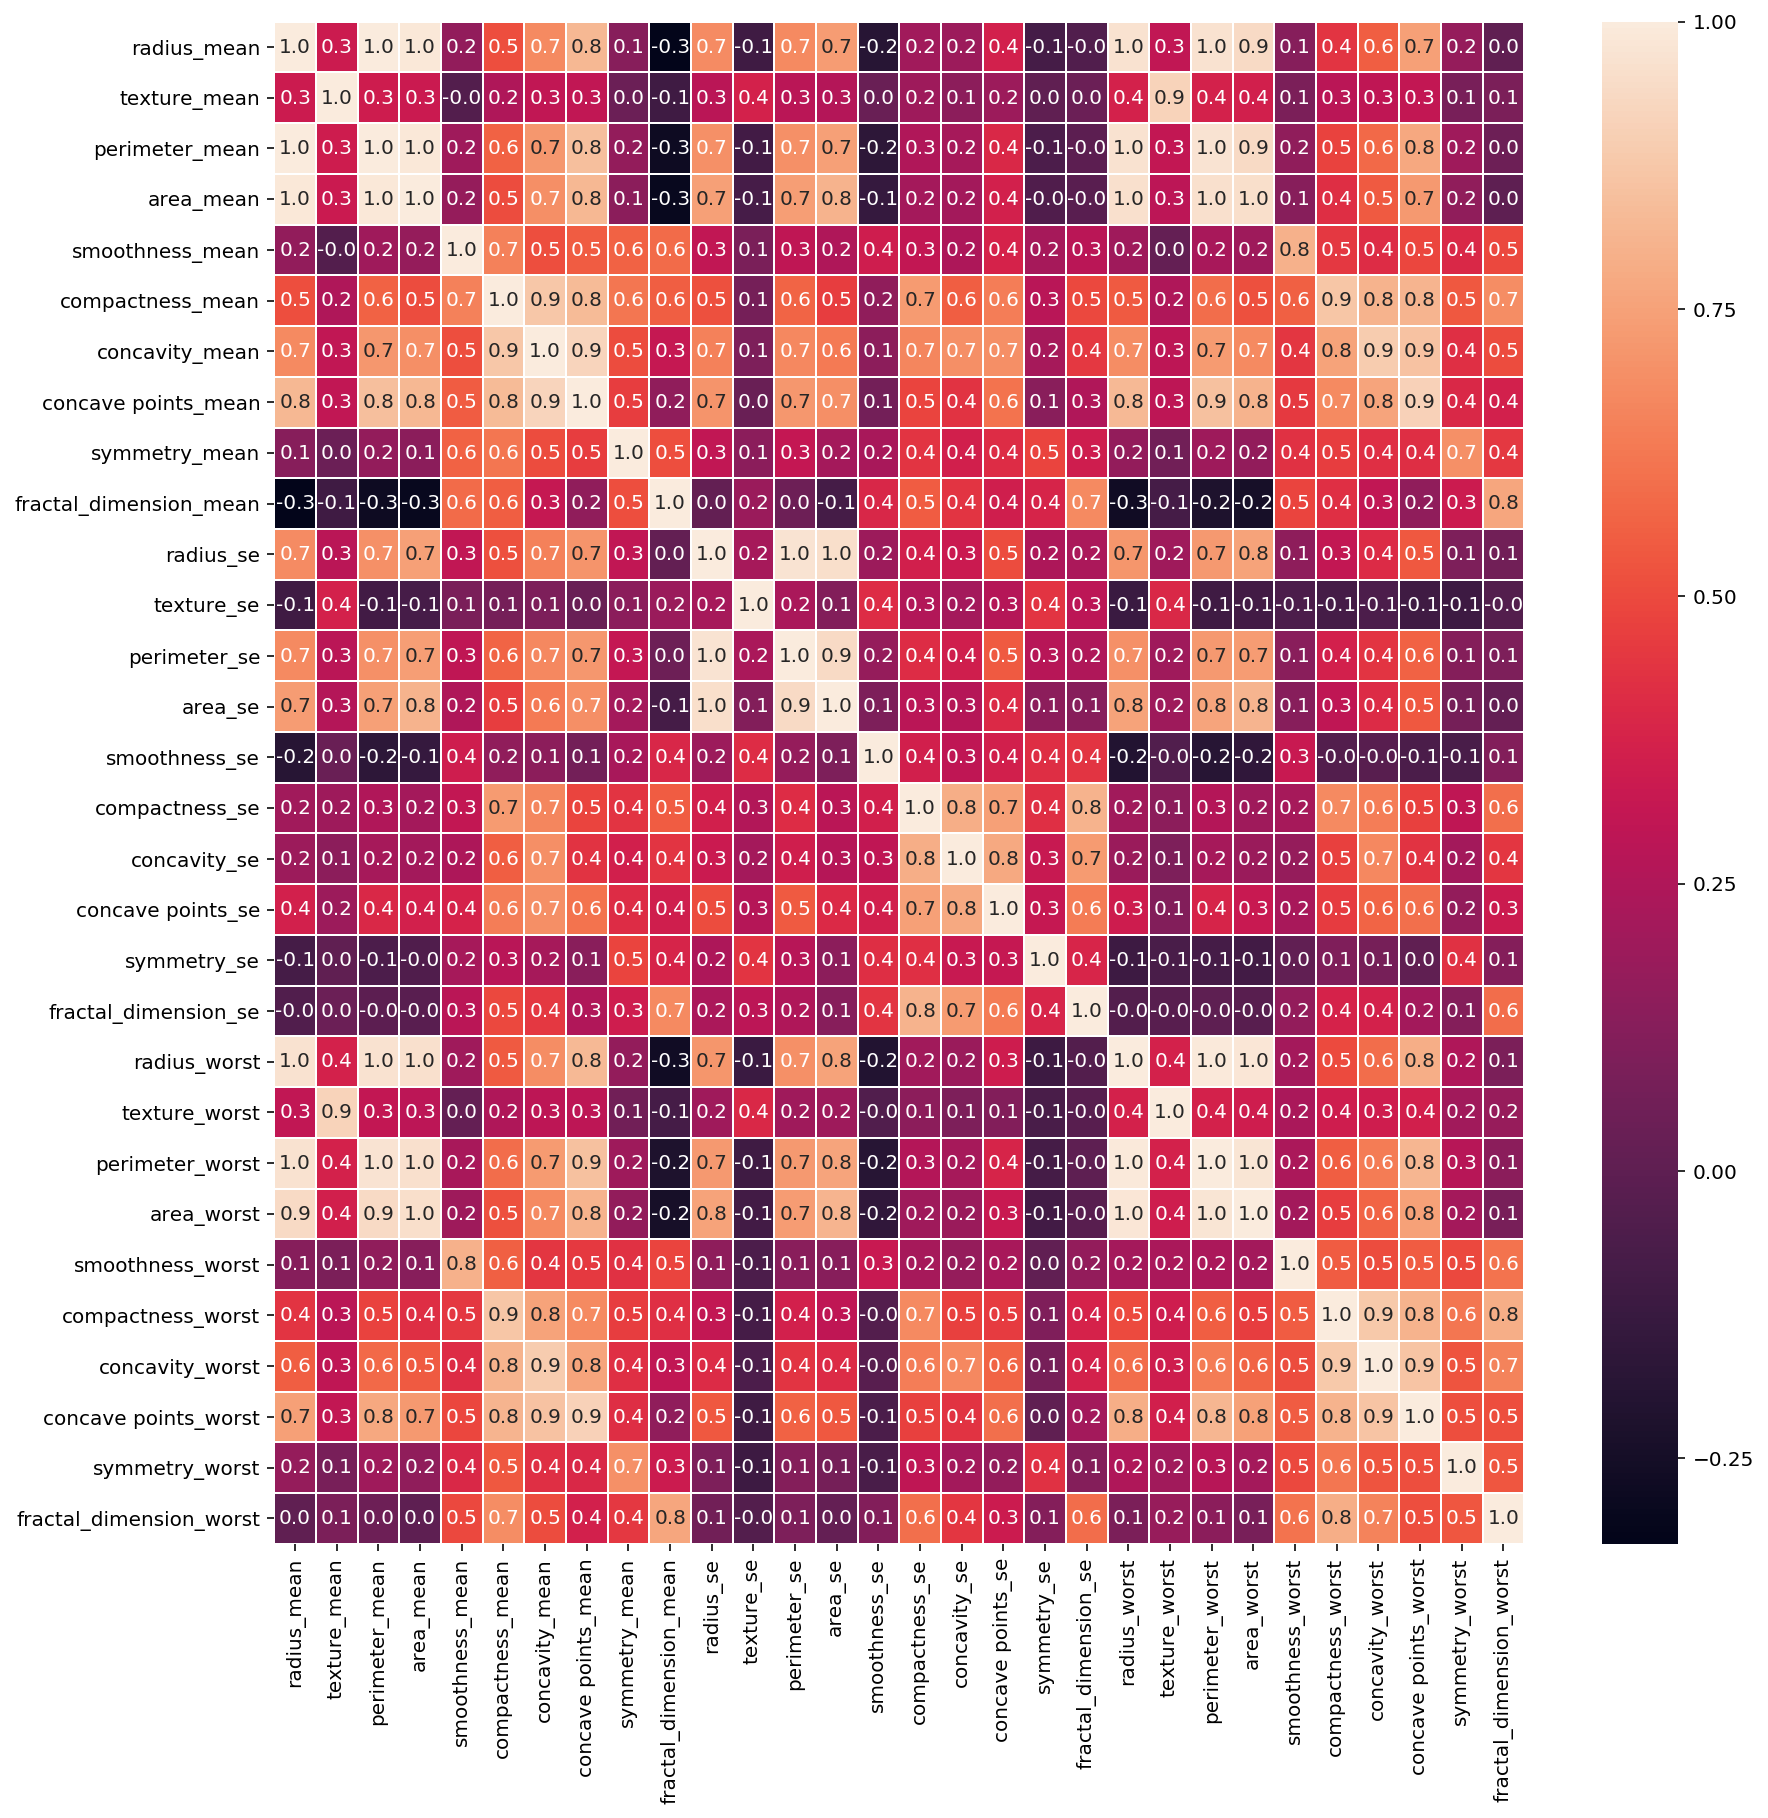

In [25]:
import seaborn as sns
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [27]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

In [28]:
X1 = X.drop(drop_list1,axis = 1 )

In [29]:
# Decision Tree classifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
clf_DT = tree.DecisionTreeClassifier()
clf_DT.fit(X1_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
import graphviz
feature_names1 = X1.columns.values
dot_data = tree.export_graphviz(clf_DT, out_file=None, feature_names=feature_names1, class_names=['Malignant','Benign'], filled=False, rounded=True,                  special_characters=False)
graph = graphviz.Source(dot_data)

In [32]:
# Training logistic regression classifier
from sklearn.linear_model import LogisticRegression

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
clf_LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X1_train, y_train)
clf_LR.fit(X1_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
cm_lr = confusion_matrix(y_test,clf_LR.predict(X1_test))
print("The confusion matrix for Logistic Regression :\n", cm_lr)
print('\n')
cm_dt = confusion_matrix(y_test,clf_DT.predict(X1_test))
print("The confusion matrix for Decision Tree :\n", cm_dt)

The confusion matrix for Logistic Regression :
 [[102   6]
 [  3  60]]


The confusion matrix for Decision Tree :
 [[96 12]
 [ 5 58]]


In [42]:
accuracy_lr = accuracy_score(y_test,clf_LR.predict(X1_test))
print('Accuracy of Logistic Regression is: ',accuracy_lr)
print('\n')
accuracy_dt = accuracy_score(y_test,clf_DT.predict(X1_test))
print('Accuracy of Decision trees is: ',accuracy_dt)

Accuracy of Logistic Regression is:  0.9473684210526315


Accuracy of Decision trees is:  0.9005847953216374
